<a href="https://colab.research.google.com/github/DataSayant1st/MachineLearning_and_AI/blob/main/Explainable_Artificial_Intelligent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explainable Artificial Intelligence Project by Mariam Adrian Hussein

## About project:

### The data aims to predict whether income exceeds $50K/yr based on census data of Adults of different ethnicities, nationalities and background.

## Loading the Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as plt

from sklearn.neural_network import MLPClassifier   # Good for classification tasks, which my assignment seems to be
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Importing The Dataset

In [ ]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ucimlrepo import fetch

In [ ]:
# # Fetching the Metadata
from ucimlrepo import fetch_ucirepo

# # fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

# Display the first few rows of the features
print("Features (first 5 rows):")
print(X.head())

# Display the first few rows of the target
print("\nTarget (first 5 rows):")
print(y.head())

# Display the feature column names
print("\nFeature Column Names:")
print(X.columns)

# Display the target column name(s)
if isinstance(y, pd.Series):
    print("\nTarget Column Name:")
    print(y.name)
else:
    print("\nTarget Column Names:")
    print(y.columns)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [ ]:
# Fetching the actual /metadata
from ucimlrepo import fetch_ucirepo

# Fetching and naming the dataset
census_income = fetch_ucirepo(id=20)

# # Access the data
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
census_income.variables

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [ ]:
# # Display the first few rows of the features
print("Features (first 5 rows):")
print(X.head())

# # Display the first few rows of the target
print("\nTarget (first 5 rows):")
print(y.head())

# Display the feature column names
print("\nFeature Column Names:")
print(X.columns)

# # Display the target column name(s)
if isinstance(y, pd.Series):
    print("\nTarget Column Name:")
    print(y.name)
else:
    print("\nTarget Column Names:")
    # print(y.columns)

Features (first 5 rows):
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1             0             0  

# Exploratory Data Analysis (EDA)

### Column names

In [ ]:
X = census_income.data.features.copy()
y = census_income.data.targets.copy()

In [ ]:
print(X)

       age         workclass  fnlwgt  education  education-num  \
0       39         State-gov   77516  Bachelors             13   
1       50  Self-emp-not-inc   83311  Bachelors             13   
2       38           Private  215646    HS-grad              9   
3       53           Private  234721       11th              7   
4       28           Private  338409  Bachelors             13   
...    ...               ...     ...        ...            ...   
48837   39           Private  215419  Bachelors             13   
48838   64               NaN  321403    HS-grad              9   
48839   38           Private  374983  Bachelors             13   
48840   44           Private   83891  Bachelors             13   
48841   35      Self-emp-inc  182148  Bachelors             13   

           marital-status         occupation    relationship  \
0           Never-married       Adm-clerical   Not-in-family   
1      Married-civ-spouse    Exec-managerial         Husband   
2              

In [ ]:
X.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States


In [ ]:
print(y)

       income
0       <=50K
1       <=50K
2       <=50K
3       <=50K
4       <=50K
...       ...
48837  <=50K.
48838  <=50K.
48839  <=50K.
48840  <=50K.
48841   >50K.

[48842 rows x 1 columns]


In [ ]:
y.head(10)
y.tail(10)

,income
48832,<=50K.
48833,<=50K.
48834,<=50K.
48835,<=50K.
48836,<=50K.
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.
48841,>50K.


### Check the number of rows in the features DataFrame

In [ ]:

num_rows_X = X.shape[0]
print("Number of rows in the features DataFrame:", num_rows_X)

# Check the number of rows in the target DataFrame
num_rows_y = y.shape[0]
print("Number of rows in the target DataFrame:", num_rows_y)


Number of rows in the features DataFrame: 48842
Number of rows in the target DataFrame: 48842


In [ ]:
# get index of columns in original dataset
var_idxs = []
for name in X.columns:
    index = census_income.variables['name'].index[census_income.variables['name'].str.contains(name)].to_list()[0]

    var_idxs.append(int(index))

### Exploring the nature of our variables

##### What kind of variables do we have?

In [ ]:
census_income.variables.type.unique()

array(['Integer', 'Categorical', 'Binary'], dtype=object)

In [ ]:
# Printing the columns

var_names =census_income.variables.name.tolist()
print(var_names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


### Define weighted random choice function

In [ ]:
def get_weighted_choice(df_col):

    df = df_col.value_counts().rename_axis('unique_values').reset_index(name='counts')
    df['counts'] = df['counts']/df['counts'].sum()

    val = np.random.choice(df['unique_values'], p=df['counts'])

    return val

#### Exploring Binary Variables

In [ ]:
for i in var_idxs:
    type = census_income.variables.iloc[i].type
    name = var_names[i]
    if type == 'Binary':
        print(f"Index {i}", f" Variable: {name}", f"  Type: {type}")
        print(f"It has NaN values: {X[name].isnull().values.any()}")
        print(f"NaN total: {X[name].isnull().sum()}/{X[name].shape[0]}")
        print(f"Unique values")
        print(X[name].unique())
        print("\n")

Index 9  Variable: sex   Type: Binary
It has NaN values: False
NaN total: 0/48842
Unique values
['Male' 'Female']




In [ ]:
y['income'].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

##### Exploring Integral Variables

In [ ]:
# Exploring Integral variables

for i in var_idxs:
    type = census_income.variables.iloc[i].type
    name = var_names[i]
    if type == 'Integer':
        print(f"Index {i}", f" Variable: {name}", f"  Type: {type}")
        print(f"It has NaN values: {X[name].isnull().values.any()}")
        print(f"NaN total: {X[name].isnull().sum()}/{X[name].shape[0]}")
        print(f"Min, Max, Mean, Median")
        print(X[name].min(), X[name].max(), X[name].mean(), X[name].median())
        print("\n")

Index 0  Variable: age   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
17 90 38.64358543876172 37.0


Index 2  Variable: fnlwgt   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
12285 1490400 189664.13459727284 178144.5


Index 4  Variable: education-num   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
1 16 10.078088530363212 10.0


Index 10  Variable: capital-gain   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
0 99999 1079.0676262233324 0.0


Index 11  Variable: capital-loss   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
0 4356 87.50231358257237 0.0


Index 12  Variable: hours-per-week   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
1 99 40.422382375824085 40.0




##### Exploring Categorical Variables

In [ ]:
categorical_var_names = []

for i in var_idxs:
    type = census_income.variables.iloc[i].type
    name = var_names[i]
    if type == 'Categorical':
        categorical_var_names.append(name)
        print(f"Index {i}", f" Variable: {name}", f"  Type: {type}")
        print(f"It has NaN values: {X[name].isnull().values.any()}")
        print(f"NaN total: {X[name].isnull().sum()}/{X[name].shape[0]}")
        print(f"Unique values")
        print(X[name].unique())
        print("\n")

Index 1  Variable: workclass   Type: Categorical
It has NaN values: True
NaN total: 963/48842
Unique values
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]


Index 3  Variable: education   Type: Categorical
It has NaN values: False
NaN total: 0/48842
Unique values
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']


Index 5  Variable: marital-status   Type: Categorical
It has NaN values: False
NaN total: 0/48842
Unique values
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']


Index 6  Variable: occupation   Type: Categorical
It has NaN values: True
NaN total: 966/48842
Unique values
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing'

# Data Preprocessing and Feature Engineering

In [ ]:
census_income.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


### Binary Data

#### Binary encoding and renaming the column

In [ ]:
# Get dummies for sex

is_male = pd.get_dummies(X['sex'], drop_first=True, dtype=int)
is_male

,Male
0,1
1,1
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,1
48840,1


In [ ]:
# get index
column_idx = X.columns.get_loc("sex")

# drop column
X = X.drop(['sex'], axis=1)

# insert column at index column_idx
X.insert(column_idx, "male", is_male)

### Categorical data



#### Handling nulls and binary encoding

In [ ]:
# Education

# Get dummies for education

Education_level = pd.get_dummies(X['education'], drop_first=True, dtype=int)
Education_level

,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
48838,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48839,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
48840,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# drop column
X = X.drop(['education'], axis=1)


# join column to dataset
X = X.join(Education_level)

In [ ]:
# Marital status
# Get dummies for marital-status

Marital_status = pd.get_dummies(X['marital-status'], drop_first=True, dtype=int)
Marital_status


,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
48837,0,0,0,0,0,0
48838,0,0,0,0,0,1
48839,0,1,0,0,0,0
48840,0,0,0,0,0,0


In [ ]:
# drop column
X = X.drop(['marital-status'], axis=1)


# join column to dataset
X = X.join(Marital_status)

In [ ]:
# Relationship

# Get dummies for relationship

Relation = pd.get_dummies(X['relationship'], drop_first=True, dtype=int)
Relation

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
48837,1,0,0,0,0
48838,0,1,0,0,0
48839,0,0,0,0,0
48840,0,0,1,0,0


In [ ]:
# drop column
X = X.drop(['relationship'], axis=1)


# join column to dataset
X = X.join(Relation)

In [ ]:
# Race
# Get dummies for race

Race_type = pd.get_dummies(X['race'], drop_first=True, dtype=int)
Race_type


,Asian-Pac-Islander,Black,Other,White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
48837,0,0,0,1
48838,0,1,0,0
48839,0,0,0,1
48840,1,0,0,0


In [ ]:
# drop column
X = X.drop(['race'], axis=1)


# join column to dataset
X = X.join(Race_type)

In [ ]:
# Native country has missing values

print(X['native-country'].unique())
print("It has NaNs: ", X['native-country'].isnull().values.any())

['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands' nan]
It has NaNs:  True


In [ ]:
# count unique values
X['native-country'].value_counts()

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [ ]:
# Get dummies for native-country

Native_country = pd.get_dummies(X['native-country'], drop_first=True, dtype=int)
Native_country

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
name = 'native-country'
X[name] = X[name].map(lambda x: x if not x=='nan' else get_weighted_choice(X[name]))

In [ ]:
# get dummies for native country column
country = pd.get_dummies(X['native-country'], drop_first=False, dtype=int)
country

,?,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = X.drop(['native-country'],axis=1)

In [ ]:
X = X.join(country)
X.head()


,age,workclass,fnlwgt,education-num,occupation,male,capital-gain,capital-loss,hours-per-week,11th,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,State-gov,77516,13,Adm-clerical,1,2174,0,40,0,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,13,Exec-managerial,1,0,0,13,0,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,9,Handlers-cleaners,1,0,0,40,0,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,7,Handlers-cleaners,1,0,0,40,1,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,13,Prof-specialty,0,0,0,40,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Occupation has missing values

In [ ]:
print(X['occupation'].unique())
print("It has NaNs: ", X['occupation'].isnull().values.any())

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]
It has NaNs:  True


In [ ]:
# count unique values
X['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [ ]:
name = 'occupation'
X[name] = X[name].map(lambda x: x if not x=='nan' else get_weighted_choice(X[name]))

In [ ]:
# X = X.drop(['occupation'],axis=1)

In [ ]:
# using nan place holder
X['occupation'] = X['occupation'].map(lambda x: np.nan if x=='?' else x)

In [ ]:
X['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [ ]:
np.nan

nan

In [ ]:
# get dummies for occupation column

Occupation = pd.get_dummies(X['occupation'], drop_first=False, dtype=int)
Occupation

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48838,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48839,0,0,0,0,0,0,0,0,0,1,0,0,0,0
48840,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [ ]:
# drop column
X = X.drop(['occupation'], axis=1)


# join column to dataset
X = X.join(Occupation)

In [ ]:
# workclass
# Get dummies for workclass

Work_class = pd.get_dummies(X['workclass'], drop_first=True, dtype=int)
Work_class


,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
48837,0,0,0,1,0,0,0,0
48838,0,0,0,0,0,0,0,0
48839,0,0,0,1,0,0,0,0
48840,0,0,0,1,0,0,0,0


In [ ]:
# drop column
X = X.drop(['workclass'], axis=1)


# join column to dataset
X = X.join(Work_class)

In [ ]:
X

,age,fnlwgt,education-num,male,capital-gain,capital-loss,hours-per-week,11th,12th,1st-4th,...,Tech-support,Transport-moving,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,7,1,0,0,40,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,0,36,0,0,0,...,0,0,0,0,0,1,0,0,0,0
48838,64,321403,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48839,38,374983,13,1,0,0,50,0,0,0,...,0,0,0,0,0,1,0,0,0,0
48840,44,83891,13,1,5455,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Integral data

In [ ]:
# Exploring Integral variables

for i in var_idxs:
    type = census_income.variables.iloc[i].type
    name = var_names[i]
    if type == 'Integer':
        print(f"Index {i}", f" Variable: {name}", f"  Type: {type}")
        print(f"It has NaN values: {X[name].isnull().values.any()}")
        print(f"NaN total: {X[name].isnull().sum()}/{X[name].shape[0]}")
        print(f"Min, Max, Mean, Median")
        print(X[name].min(), X[name].max(), X[name].mean(), X[name].median())
        print("\n")

Index 0  Variable: age   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
17 90 38.64358543876172 37.0


Index 2  Variable: fnlwgt   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
12285 1490400 189664.13459727284 178144.5


Index 4  Variable: education-num   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
1 16 10.078088530363212 10.0


Index 10  Variable: capital-gain   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
0 99999 1079.0676262233324 0.0


Index 11  Variable: capital-loss   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
0 4356 87.50231358257237 0.0


Index 12  Variable: hours-per-week   Type: Integer
It has NaN values: False
NaN total: 0/48842
Min, Max, Mean, Median
1 99 40.422382375824085 40.0




###  Features(y)

In [ ]:
y

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
48837,<=50K.
48838,<=50K.
48839,<=50K.
48840,<=50K.


In [ ]:
# Get dummies for income

In [ ]:
print(y['income'].unique())
print("It has NaNs: ", y['income'].isnull().values.any())

['<=50K' '>50K' '<=50K.' '>50K.']
It has NaNs:  False


In [ ]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [ ]:
 y = y['income'].map(lambda x: 0 if x=='<=50K.' or x=='<=50K' else 1)

In [ ]:
y

# 0 is <= 50K

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [ ]:
X

,age,fnlwgt,education-num,male,capital-gain,capital-loss,hours-per-week,11th,12th,1st-4th,...,Tech-support,Transport-moving,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53,234721,7,1,0,0,40,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0,0,0,36,0,0,0,...,0,0,0,0,0,1,0,0,0,0
48838,64,321403,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48839,38,374983,13,1,0,0,50,0,0,0,...,0,0,0,0,0,1,0,0,0,0
48840,44,83891,13,1,5455,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48837    0
48838    0
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

# Using Pycaret

In [ ]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install pycaret

In [ ]:
import matplotlib.pyplot as plt
from pycaret.classification import *

In [ ]:
dataset = pd.concat([X, y], axis=1)

In [ ]:
s = setup(data = dataset, target = 'income', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,income
2,Target type,Binary
3,Original data shape,"(48842, 102)"
4,Transformed data shape,"(48842, 102)"
5,Transformed train set shape,"(34189, 102)"
6,Transformed test set shape,"(14653, 102)"
7,Numeric features,101
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8736,0.9295,0.6531,0.7828,0.7119,0.6317,0.6361,0.4750
gbc,Gradient Boosting Classifier,0.8665,0.9217,0.6036,0.7892,0.6838,0.6011,0.6099,1.6880
ada,Ada Boost Classifier,0.8627,0.9159,0.6158,0.7652,0.6822,0.5960,0.6018,1.0350
rf,Random Forest Classifier,0.8558,0.9039,0.6223,0.7347,0.6736,0.5819,0.5854,1.5150
lr,Logistic Regression,0.8529,0.9072,0.6036,0.7349,0.6626,0.5697,0.5744,0.9070
svm,SVM - Linear Kernel,0.8443,0.8904,0.5879,0.7117,0.6434,0.5451,0.5495,0.4260
lda,Linear Discriminant Analysis,0.8432,0.8936,0.5657,0.7193,0.6332,0.5353,0.5416,0.4040
ridge,Ridge Classifier,0.8416,0.8936,0.5087,0.7493,0.6059,0.5113,0.5264,0.2280
et,Extra Trees Classifier,0.8371,0.8810,0.6047,0.6794,0.6397,0.5349,0.5365,2.2820
knn,K Neighbors Classifier,0.8233,0.8386,0.5661,0.6503,0.6052,0.4920,0.4941,0.7350


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

#####  The best performing models according to pycaret ranked in terms of overall scores: lightgbm - > Naive Bayes -> Gradient Boosting classifier

In [ ]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


In [ ]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8687,0.9278,0.6516,0.7647,0.7036,0.6200,0.6232
1,0.8769,0.9311,0.6589,0.7915,0.7191,0.6411,0.6456
2,0.8701,0.9256,0.6479,0.7726,0.7048,0.6224,0.6263
3,0.8777,0.9316,0.6773,0.7825,0.7261,0.6479,0.6507
4,0.8707,0.9294,0.6308,0.7866,0.7001,0.6190,0.6251
5,0.8769,0.9335,0.6663,0.7864,0.7214,0.6430,0.6467
6,0.8725,0.9296,0.6540,0.7776,0.7105,0.6295,0.6334
7,0.8696,0.9266,0.6149,0.7934,0.6928,0.6117,0.6197
8,0.8807,0.9327,0.6606,0.8063,0.7262,0.6508,0.6561


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8696,0.9259,0.6516,0.7680,0.7050,0.6220,0.6255
1,0.8754,0.9306,0.6589,0.7857,0.7168,0.6377,0.6417
2,0.8666,0.9238,0.6418,0.7631,0.6972,0.6125,0.6163
3,0.8763,0.9303,0.6846,0.7724,0.7259,0.6463,0.6483
4,0.8675,0.9283,0.6284,0.7753,0.6941,0.6107,0.6162
5,0.8757,0.9333,0.6724,0.7779,0.7213,0.6419,0.6447
6,0.8722,0.9295,0.6614,0.7718,0.7123,0.6308,0.6339
7,0.8693,0.9240,0.6259,0.7841,0.6961,0.6142,0.6205
8,0.8801,0.9291,0.6679,0.7985,0.7274,0.6513,0.6556


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


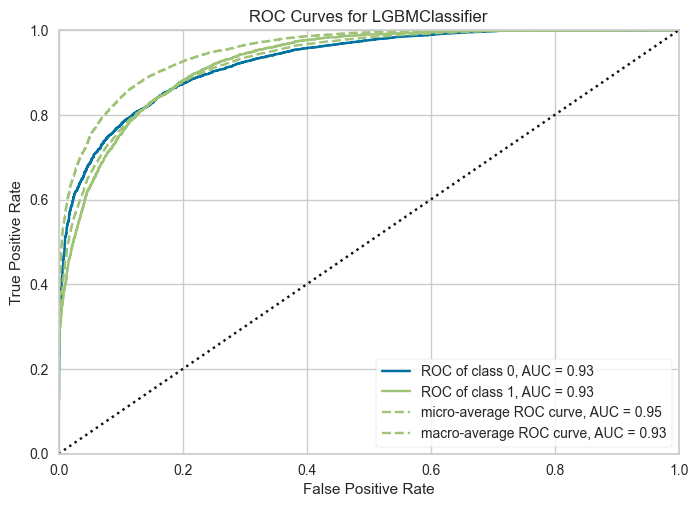

In [ ]:
plot_model(tuned_model, plot = 'auc')

In [ ]:
# The curve looks good with a reasonable amount of loss function

# Training the Model

#### Splitting the Data into test and train datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

### 1.  LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Initializing LightGBM classifier
lgbm = LGBMClassifier()

# Training the classifier on the training data
lgbm.fit(X_train, y_train)

# Making predictions on the test set
y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 7921, number of negative: 24803
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002883 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 769
[LightGBM] [Info] Number of data points in the train set: 32724, number of used features: 88
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242055 -> initscore=-1.141447
[LightGBM] [Info] Start training from score -1.141447


#### Model Evaluation

In [ ]:
# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8758530835091203


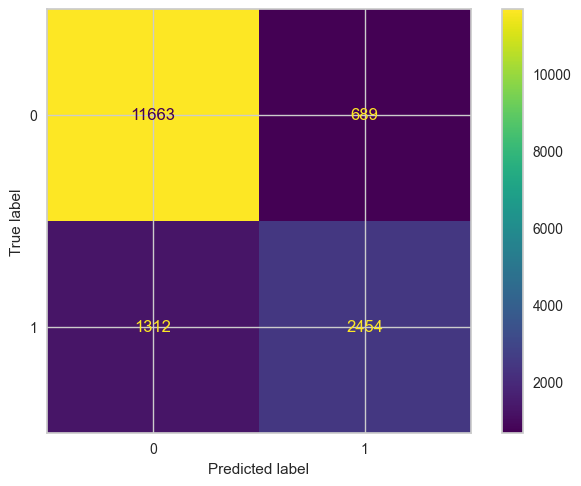

In [ ]:
# Its correlation matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
lgbm.score(X_test,y_test)
lgbm.score(X_test,y_test)
y_hat = lgbm.predict(X_test)

conf_mat = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

# 2.  Initialising MLP


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Iteration 1, loss = 1.08425931
Iteration 2, loss = 0.67926484
Iteration 3, loss = 0.67830158
Iteration 4, loss = 0.67672168
Iteration 5, loss = 0.67587767
Iteration 6, loss = 0.67489421
Iteration 7, loss = 0.67384383
Iteration 8, loss = 0.67288180
Iteration 9, loss = 0.67192662
Iteration 10, loss = 0.67095697
Iteration 11, loss = 0.67004370
Iteration 12, loss = 0.66904200
Iteration 13, loss = 0.66812183
Iteration 14, loss = 0.66719925
Iteration 15, loss = 0.66623238
Iteration 16, loss = 0.66528425
Iteration 17, loss = 0.66457705
Iteration 18, loss = 0.66344515
Iteration 19, loss = 0.66231558
Iteration 20, loss = 0.66102382
Iteration 21, loss = 0.65998331
Iteration 22, loss = 0.65888454
Iteration 23, loss = 0.65800284
Iteration 24, loss = 0.65705375
Iteration 25, loss = 0.65630985
Iteration 26, loss = 0.65538851
Iteration 27, loss = 0.65446809
Iteration 28, loss = 0.65373829
Iteration 29, loss = 0.65292808
Iteration 30, loss = 0.65198896
Iteration 31, loss = 0.65111424
Iteration 32, los

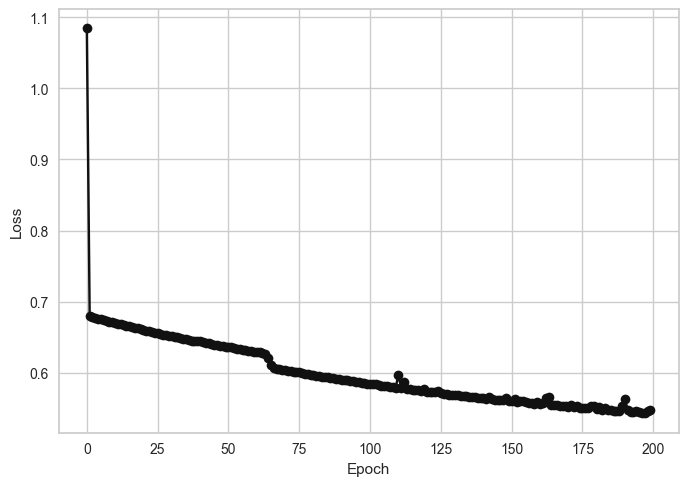

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=64,
verbose=True,
solver="sgd",
learning_rate_init=0.00001).fit(X_train, y_train)
plt.plot(mlp.loss_curve_,"-ok")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()


#### Evaluating the model's performance

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [ ]:
y_pred_mlp = mlp.predict(X_test)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print("Accuracy for MLP Classifier:", accuracy_mlp)


Accuracy for MLP Classifier: 0.7885593746122348


In [ ]:
mlp.score(X_train,y_train)

0.7815976042048649

In [ ]:
mlp.score(X_test,y_test)

0.7885593746122348

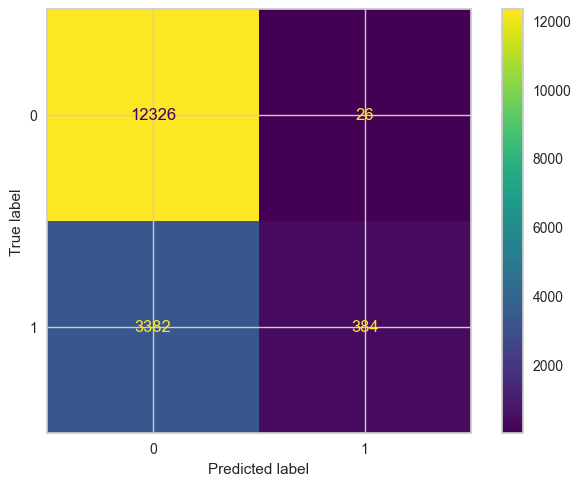

In [ ]:
# Its correlation matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mlp.score(X_test,y_test)
mlp.score(X_test,y_test)
y_hat = mlp.predict(X_test)

conf_mat = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

# 3.  Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Initialising
dt_classifier = DecisionTreeClassifier(max_depth=2, random_state=42)

dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)


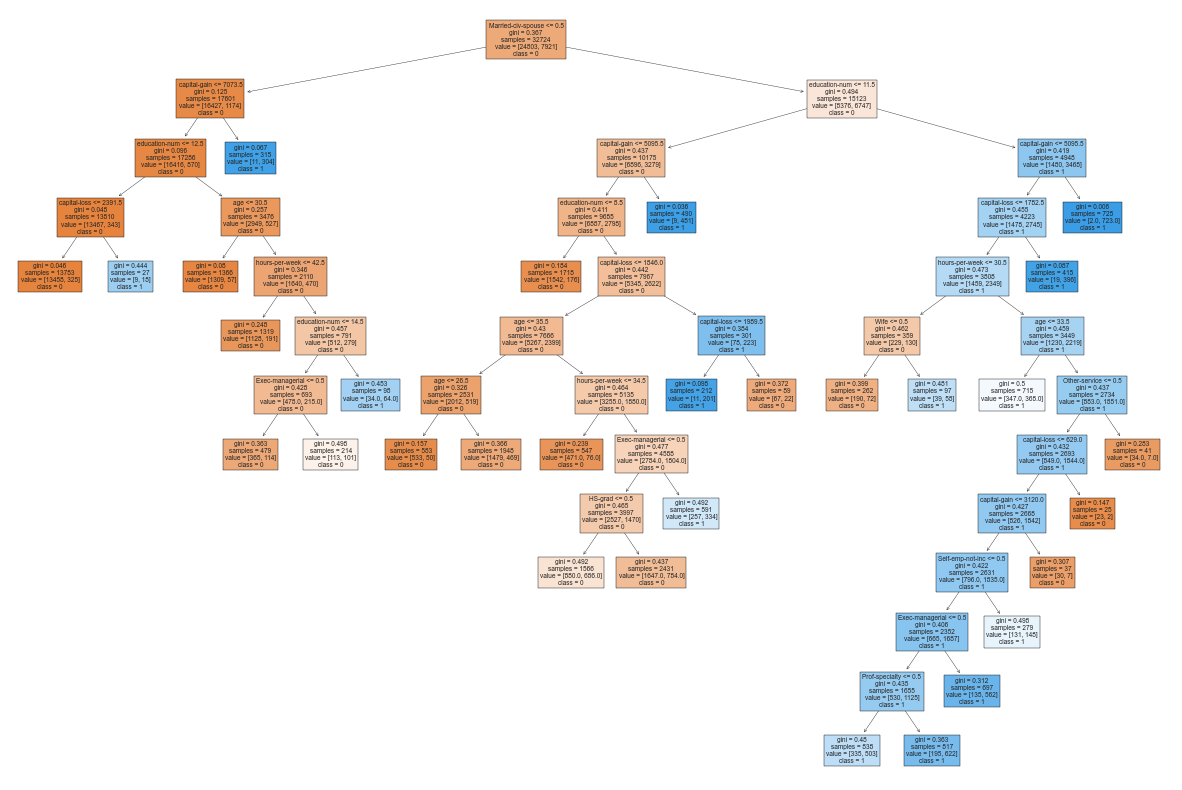

In [ ]:
import numpy as np

max_leaf_nodes = 30
dt_classifier = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Visualize the Decision Tree with plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=[str(i) for i in dt_classifier.classes_])
plt.show()



# Model Evaluation

In [ ]:
dt_classifier.score(X_train,y_train)

0.8571996088497739

In [ ]:
dt_classifier.score(X_test,y_test)

0.858357116267527

In [ ]:
y_hat = dt_classifier.predict(X_test)

In [ ]:
y_pred_dt = dt_classifier.predict(X_test)

Accuracy for Decision Tree Classifier: 0.858357116267527


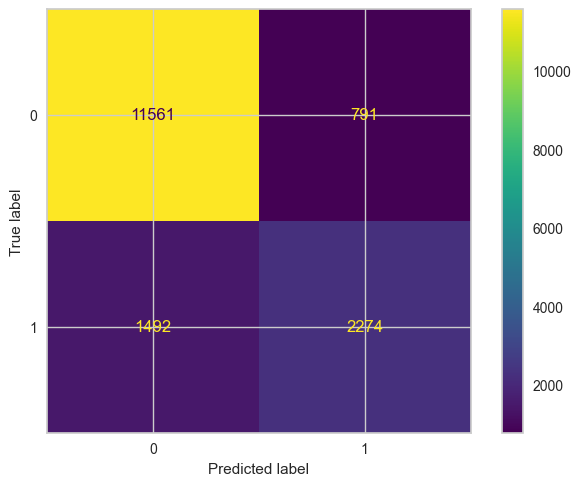

In [ ]:
# Its correlation matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
dt_classifier.score(X_test,y_test)
dt_classifier.score(X_test,y_test)
y_hat = dt_classifier.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_mat = confusion_matrix(y_test, y_hat)

print("Accuracy for Decision Tree Classifier:", accuracy_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

# 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)


# Model Evaluation

In [ ]:
# Evaluating the accuracy of the model

accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy for Random Forest Classifier:", accuracy_rf)


Accuracy for Random Forest Classifier: 0.8599081771932001


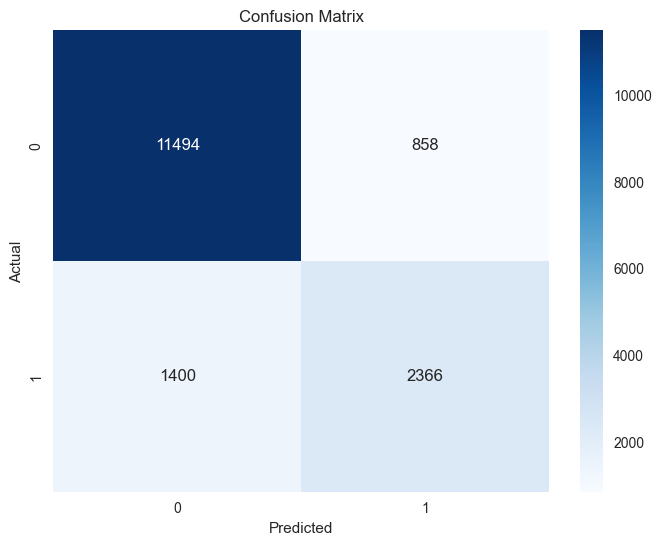

In [ ]:
# Its confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# Overall Model(s) Evaluation

#### 1. The best ranked model of the 4 is LGBM Classifier as suggested by Pycaret with an accuracy of 0.876%

#### 2. The 2nd and 3rd best models are Random Forest Classifier (0.859%) , followed by Decision Tree Classifier (0.858

#### 3. MLP Classifier got a score of 0.786% which is quite good but ranking last

# Prefered Model Selection for Explanation -> LGBMClassifier

#### Explaining the chosen LGBM Classifier with LIME

In [ ]:
# Explaining how the model works

!pip install lime

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
from random import randint

In [ ]:
# Initialize the LIME explainer object
explainer = LimeTabularExplainer(X.values,
                                 mode='classification',
                                 feature_names=X.columns)

In [ ]:
# Choose a example to explain
sample = X.iloc[200].values

In [ ]:
# Compute the LIME explanation for the sample
explanation = explainer.explain_instance(sample, lgbm.predict_proba)

In [ ]:
# Visualize the LIME explanation
explanation.show_in_notebook()

## Conclusions



#### The findings from the task showed that racial background, their relationship status,  country and type of job did in fact determine how much money they earned.

#### Those with more privileged backgrounds especially interms of race and country and jobs were more likely to make more than 50K a year compared to the rest.